<a href="https://colab.research.google.com/github/mikias-wondim/NLP_in_TensorFlow/blob/main/Introduction_to_NLP_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals

**Natural Language Processing (NLP)** is a subfield of artificial intelligence that gives computers the ability to understand and generate human language. NLP is used in a wide range of applications, including:

* Text Classification
* Machine translation: Translating text from one language to another.
* Text summarization: Creating concise summaries of longer texts.
* Sentiment analysis: Determining the sentiment of a text (e.g., positive, negative, or neutral).
* Named entity recognition: Identifying named entities in a text (e.g., people, places, organizations).
* Question answering: Answering questions based on a text or a set of texts.


NLP is a complex and challenging field, but it is also a rapidly growing one. As the amount of text data available continues to grow, the need for NLP tools and techniques will only increase.


## NLP Text Classification

In this tutorial, we will cover:

**Text Classification NLP using Kaggle's Disaster Tweets Dataset**

**Objective**:

We will use NLP techniques to classify tweets as either related to a disaster or not. We will use the NLP with Disaster Tweets dataset from Kaggle.

**Dataset**:

The NLP with Disaster Tweets dataset contains over 10,000 tweets labeled as either related to a disaster or not. The dataset is divided into training and test sets.

In [ ]:
# Lets check the GPU
!nvidia smi -L

/bin/bash: line 1: nvidia: command not found


### Get helper function
We download helper function, which our beloved instructor [mrdbourke](https://github.com/mrdbourke/) set up beautifully! (Thankyou so much for your work, Brother)

In [ ]:
# Get helper functions file
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

[INFO] 'helper_functions.py' already exists, skipping download.


In [ ]:
# Import important functions from our helper module
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

### Import our Dataset

We can Import our dataset from kaggle directly but our beloved instructor has already uploaded the dataset into google storage which makes it much easier to download. Lets do that!



In [ ]:
# Get the dataset from google storage api
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip the downloaded data using one of our helper function unzip_data(filepath.zip)
unzip_data('nlp_getting_started.zip')

--2024-02-20 18:53:43--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K   699KB/s    in 0.8s    

2024-02-20 18:53:45 (699 KB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



### Get one with our data

A best way to get along with our data is to visualize it, and in order for us to visualize we need to read them in. One way to do so is using pandas library.

In [ ]:
# Read our csv files using pandas

import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the dataframe
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle the training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=21)
train_df_shuffled.head()

,id,keyword,location,text,target
478,688,attack,"Dayton, Ohio",A Dayton-area org tells me it was hit by a cyb...,1
2210,3166,deluge,Brisbane,China is only delaying the deluge: If the fund...,0
1493,2153,catastrophe,NaN,bbc r5live studio discussion of hiroshima v po...,1
148,212,airplane%20accident,Indonesia,#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Fa...,1
6766,9697,tornado,NaN,@Ayshun_Tornado then don't,0


In [ ]:
# Lets see our test dataframe
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


We see that the test dataframe doesn't contain the target value.

In [ ]:
# Lets count the total amount of dataset we have in the training and test set
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Lets see how many examples does of the two class our training dataset has
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

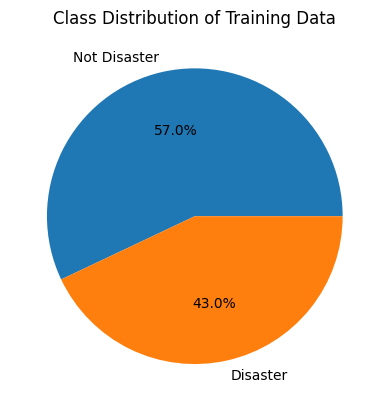

In [ ]:
# Plot into a pie chart the class distribution of the training data

import matplotlib.pyplot as plt

class_counts = train_df['target'].value_counts()
labels = ['Not Disaster', 'Disaster']

plt.pie(class_counts, labels=labels, autopct='%1.1f%%')
plt.title('Class Distribution of Training Data')
plt.show()

>Our classes are relatively balanced, this is very essential to build a very accurate model that has a equivalen understanding and generalization of each classes.

In [ ]:
# Lets visualize 5 random training examples
import random
random_index = random.randint(0, len(train_df))
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target} ({labels[target]})")
  print(f"Text: {text}")
  print(f"---\n")

Target: 0 (Not Disaster)
Text: @RJG0789 idk....I feel like his movies have done more harm than good. They make us look sterotypical annddd colorism is prevalent sort of
---

Target: 1 (Disaster)
Text: @AdamNibloe Arrest report: Affiliation with Terrorism
---

Target: 1 (Disaster)
Text: Firefigthers Evacuate from Northampton Township House Fire http://t.co/hPplD1jHtZ
---

Target: 1 (Disaster)
Text: illegal alien released by Obama/DHS 4 times Charged With Rape &amp; Murder of Santa Maria CA Woman Had Prior Offenses  http://t.co/MqP4hF9GpO
---

Target: 0 (Not Disaster)
Text: GENERAL AUDIENCE: On Wounded Families | ZENIT - The World Seen From Rome http://t.co/hFvnyfT78C
---



### Spliting data into training and validation sets

Since we have a test set with out a target value, we can't use that as validation set, therefore we need to create our own validation data

We use scikit learn's `train_test_split()` function to split our data

In [ ]:
# Split the training data to
from sklearn.model_selection import train_test_split

# Split the data into train and validation sets
train_text, val_text, train_label, val_label = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                train_df_shuffled['target'].to_numpy(),
                                                                test_size=0.2,
                                                                random_state=21)

# Print the number of examples in each set
len(train_text), len(val_text)

(6090, 1523)

### Text Vectorization

**Text vectorization** is the process of converting textual data into numerical representations that can be used by machine learning algorithms. This is important because our machine learning algorithms require numerical input features, and text data is not numerical.

**Tokenization** is the process of breaking down a text sequence into individual units called tokens. These tokens can be words, phrases, or even individual characters. Tokenization is an important step in text processing because it allows us to analyze and manipulate the text more easily.

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Lest keep the defualt parameters
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation', # change the strings into lowercase and remove special characters
                                    split='whitespace', # change the punctuations into ' ' (whitespace)
                                    ngrams=None, # group each n-words into sinlge token
                                    output_mode='int', # map the tokens into ints
                                    output_sequence_length=None)

In [ ]:
# Find the average number of tokens, sequence of words, in one training tweet
round(sum([len(i.split()) for i in train_text]) / len(train_text))

15

In [ ]:
# Set global vectorization variables
max_vocab_length = 10000  # Maximum number of words to keep, based on word frequency.
sequence_length = 15  # Length of maximum text sequences to be processed.

# Now lets create a vectorizer with
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int', # map the tokens into ints
                                    output_sequence_length=sequence_length)

In [ ]:
# Adapt the vectorizatio to the training data
text_vectorizer.adapt(train_text)

In [ ]:
# Create a sample sentence and tokenize it
sample_text = 'Oh my God, There is a disaster at someones city!'
text_vectorizer([sample_text])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 400,   13,  224,   75,   10,    3,   74,   17, 2497,  185,    0,
           0,    0,    0,    0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_text = random.choice(train_text)
print(f"Original text: \n{random_text}")
print(f"\n Vectorized version: \n {text_vectorizer([random_text])}")

Original text: 
When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol

 Vectorized version: 
 [[  42    8   24 5450 1421    8   89  592   81    1   49   32 8765  166
     0]]


In [ ]:
# Number words in the vocabulary
vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(vocab)}")

# Get the most common words
most_common = vocab[:5]
print(f"Most common words: {most_common}")

# Get the least common words
least_common = vocab[-5:]
print(f"Least common words: {least_common}")

Number of words in vocabulary: 10000
Most common words: ['', '[UNK]', 'the', 'a', 'in']
Least common words: ['minimehh', 'minimal', 'miniature', 'minhazmerchant', 'mingo']


### Direct mapping of words to numbers
A straight mapping of token to numbers is called one-hot encoding.

In one-hot encoding, each unique token in the vocabulary is assigned a unique vector. The vector has the same length as the vocabulary, and all of the values in the vector are 0 except for the value at the index corresponding to the token.

One-hot encoding is a simple and straightforward way to represent tokens as vectors. However, it is also a very inefficient representation, because it requires a large number of vectors to represent a relatively small vocabulary.

For this reason, one-hot encoding is not typically used for large datasets. Instead, more efficient representations such as word embeddings are used.

### Creating Word Embedding as a layer

**Embedding** is the process of representing tokens as vectors of real numbers. These vectors are learned from the data using a variety of techniques, such as neural networks. Embeddings are preferable to one-hot encoding and other forms of encoding because they:

* **Capture semantic relationships between words**: Words that have similar meanings will have similar embeddings. This is important for many natural language processing tasks, such as sentiment analysis and topic modeling.
* **Are more compact**: Embeddings are typically much more compact than one-hot encodings. This is important for large datasets, where memory usage is a concern.
* **Are more robust to noise**: Embeddings are less affected by noise in the data than one-hot encodings. This is because embeddings are learned from the data, and they are able to capture the underlying structure of the data.


**Why is embedding preferable to one-hot encoding and other forms of encoding?**

* Capturing of Semantic relationships
* Compactness
* Robustness

The fillable parameters in the `Embedding` layer in TensorFlow are:

* `input_dim`: This is the size of the vocabulary for the input data. It is the total number of possible words or tokens in your input data.
* `output_dim`: This is the dimensionality of the embedding vectors. It is the number of dimensions that each word or token will be represented by.
* `embeddings_initializer`: This is the initializer function used to initialize the embedding vectors. It can be a TensorFlow initializer function or a numpy array.
* `embeddings_regularizer`: This is the regularizer function used to regularize the embedding vectors. It can be a TensorFlow regularizer function or a Python function that takes the embedding vectors as input and returns a regularization penalty.
* `embeddings_constraint`: This is the constraint function used to constrain the embedding vectors. It can be a TensorFlow constraint function or a Python function that takes the embedding vectors as input and returns a constrained version of the vectors.
* `mask_zero`: This is a boolean flag that indicates whether or not to mask the zero embedding vector. If `True`, the zero embedding vector will be masked out and not used in the model.
* `input_length`: This is the length of the input sequences. It is the maximum number of words or tokens in any single input sequence.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding

# Create an embedding layer with an embedding dimension of 64
embedding_layer = Embedding(input_dim=max_vocab_length, # input shape
                                            output_dim=128, # output shape
                                            input_length=sequence_length # dimension of the dense vector
                                            )

# Initialize the embedding vectors with a normal distribution
# embedding_layer.embeddings_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=1.0)

# Regularize the embedding vectors with L2 regularization
# embedding_layer.embeddings_regularizer = tf.keras.regularizers.l2(l=0.01)

In [ ]:
# Random text to compare the original and embeded version
random_text = random.choice(train_text)
print(f"Original text: \n{random_text}")
random_embedded = embedding_layer(text_vectorizer([random_text]))
print(f"\n Embedded version: \n {random_embedded}")
print(f"\n Embedded sample shape: {random_embedded.shape}")

Original text: 
First Responders get int @bridgeportspeed free on Saturday! Details @ http://t.co/dIh1TgQhej

 Embedded version: 
 [[[ 0.04492543 -0.01831584 -0.01334279 ...  0.03823947  0.02171899
    0.03264963]
  [-0.02033813  0.00929182  0.04311072 ...  0.00589284 -0.01766156
   -0.04804086]
  [ 0.03071732  0.04524188  0.04540955 ... -0.04016718 -0.00038261
   -0.01036077]
  ...
  [-0.01646554  0.00994357  0.04310561 ... -0.04666553 -0.01709821
    0.02944005]
  [-0.01646554  0.00994357  0.04310561 ... -0.04666553 -0.01709821
    0.02944005]
  [-0.01646554  0.00994357  0.04310561 ... -0.04666553 -0.01709821
    0.02944005]]]

 Embedded sample shape: (1, 15, 128)


> Notice the shape (1, 15, 128), if same as `(batch, sequence_length, num_dims)`

### Modeling a text classifier using different experiment

We experiment by building a series of modelling experiments used to classify our preprocessed texts

We'll start with simple and quick base line model and move from there on:

* Model 0: Naive Bayes (baseline)
* Model 1: Feed Forward Neural Network (dense model)
* Model 2: LSTM (Gated RNN model)
* Model 3: GRUs (Another gated RNN model)
* Model 4: Bidirectional-LSRM
* Model 5: 1D CNN
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as Model 6, but with 10% of training data

**General Steps:**
1. Build a model
2. Compile a model
3. Fit a model
4. Evaluate the model and Visualize

### Model 0: Naive Bayes (Baseline model)

**Naive Bayes** is a simple but powerful probabilistic classifier that is often used for text classification tasks. It works by calculating the probability that a document belongs to a particular class based on the frequency of words in the document.

**TF-IDF** (Term Frequency-Inverse Document Frequency) is a weighting scheme that is used to adjust the importance of words in a document. It is calculated by multiplying the term frequency (the number of times a word appears in a document) by the inverse document frequency (the logarithm of the number of documents that contain the word).

Naive Bayes with TF-IDF encoder is a good practice to use as a baseline for building a text classifier model because it is:

* Simple to implement and understand.
Fast to train.
* Effective on a wide range of text classification tasks.


>However, it is important to note that Naive Bayes with TF-IDF encoder is not always the best choice for text classification. But, its a good practice to use a non-DL algorithm for a baseline because of their efficiency.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Create a pipeline with a TF-IDF encoder and a Naive Bayes classifier
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()), # convert workds to numbers
    ('clf', MultinomialNB()), # model the text
])

# 2. Fit the pipeline to the training data
model_0.fit(train_text, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# 3. Evaluate the model

# Predict the labels of the validation data
baseline_pred = model_0.predict(val_text)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val_label, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.25%


Lets create a function that can help us to evaluate the prediction performance of the models with truth table using different common metrics of evaluations.

The metrics we use are:
* Accuracy
* Precision
* Recall
* F1 Score

In [ ]:
# Function to evaluate performance of a model
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_results(y_true, y_pred):
  """
  Evaluate model with metrics of accuracy, precision, recall and f1score
  from the truth table build from the y_true and y_pred values

  Return:
    dictionary of evaluation results
  """
  # Calculate accuracy
  accuracy = accuracy_score(y_true, y_pred)
  # Calculate precision, recall, f1score with weighted average (we dont need the support)
  precision, recall, f1score, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

  # Create a dictionary for the results
  model_result = {'accuracy': accuracy,
                  'precision': precision,
                  'recall': recall,
                  'f1score': f1score}

  return model_result

In [ ]:
baseline_results = evaluate_results(y_true=val_label, y_pred=baseline_pred)
baseline_results

{'accuracy': 0.7925147734734077,
 'precision': 0.8024150219088574,
 'recall': 0.7925147734734077,
 'f1score': 0.7842919899119062}

### Model 1: A simple dense model (Feed Forward Network

In [ ]:
# Variable for callback directory
SAVE_DIR = 'model_logs'

In [ ]:
# 1. Build model with keras Functional API
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1D strings
x = text_vectorizer(inputs) # turn input text(str) into numbers
x = embedding_layer(x) # create a dense matrix
# Reduce the dimension of the embedding layer output for the dense layer
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x) # we use sigmoid for binary classification
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

# 2. Compile
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Summarize
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# 3. Fit model 1
history_model_1 = model_1.fit(x=train_text,
                              y=train_label,
                              epochs=5,
                              validation_data=(val_text, val_label),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240220-190710
Epoch 1/5
191/191 [==============================] - 8s 38ms/step - loss: 0.5294 - accuracy: 0.8343 - val_loss: 0.5027 - val_accuracy: 0.7938
Epoch 2/5
191/191 [==============================] - 3s 15ms/step - loss: 0.3230 - accuracy: 0.9108 - val_loss: 0.4567 - val_accuracy: 0.7853
Epoch 3/5
191/191 [==============================] - 1s 7ms/step - loss: 0.2368 - accuracy: 0.9338 - val_loss: 0.4550 - val_accuracy: 0.7859
Epoch 4/5
191/191 [==============================] - 1s 5ms/step - loss: 0.1905 - accuracy: 0.9435 - val_loss: 0.4690 - val_accuracy: 0.7853
Epoch 5/5
191/191 [==============================] - 1s 7ms/step - loss: 0.1598 - accuracy: 0.9525 - val_loss: 0.4924 - val_accuracy: 0.7794


Lets check the evaluation results on our validation set

In [ ]:
# Evaluate model 1
model_1.evaluate(val_text, val_label)

48/48 [==============================] - 0s 3ms/step - loss: 0.4924 - accuracy: 0.7794


[0.49239498376846313, 0.7793828248977661]

Its time to evaluate the model with using other evaluation metrics with our function

In [ ]:
# Make predictions using the model 1
dense_model_pred_probs = model_1.predict(val_text)
dense_model_pred_probs[:10] # check the result of the first 10 prediction probabilities

48/48 [==============================] - 0s 3ms/step


array([[0.1778759 ],
       [0.06987616],
       [0.7992304 ],
       [0.03390208],
       [0.71284693],
       [0.0009861 ],
       [0.07828604],
       [0.01319756],
       [0.92341954],
       [0.09213207]], dtype=float32)

In [ ]:
# Change the probability into prediction
dense_model_pred = tf.squeeze(tf.round(dense_model_pred_probs))
dense_model_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 1., 0., 0., 0., 1., 0.], dtype=float32)>

Since we get the prediction of model 1 we can use the function we build to evaluate the results of models, `evaluate_results()`

In [ ]:
dense_model_results = evaluate_results(y_true=val_label, y_pred=dense_model_pred)
dense_model_results

{'accuracy': 0.7793827971109653,
 'precision': 0.7779190649599003,
 'recall': 0.7793827971109653,
 'f1score': 0.7774790118665608}

Since we'll be doing this kind of comparison (baseline compared to new model) quite a few times, let's create a function to help us out.



In [ ]:
# Function to compare new models with our baseline model (model_0)
def compare_baseline_to_model_results(baseline_results, new_results):
  """
  Compare the evaluation results of the basemodel (model_0) with results of
  new models we build.
  """
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}   New {key}: {new_results[key]:.2f}   Difference: {value-new_results[key]:.2f}")

In [ ]:
# Compare the baseline model results with dense model results
compare_baseline_to_model_results(baseline_results=baseline_results,
                                  new_results=dense_model_results)

Baseline accuracy: 0.79   New accuracy: 0.78   Difference: 0.01
Baseline precision: 0.80   New precision: 0.78   Difference: 0.02
Baseline recall: 0.79   New recall: 0.78   Difference: 0.01
Baseline f1score: 0.78   New f1score: 0.78   Difference: 0.01


### Visualizing learned embeddings

Since our model has a layer of embedding, while fitting the data the model learns how to represent each words using featuer vectors. We can visualize these learned representation using [Tensorflow Projection](projector.tensorflow.org) on a 3D visualiztion. To visualize we need to export the vectors and metadata associate with weights of the embedding.

Lets see that in action!

Lets remind the word vocabulary we have in our text verctorizer

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'for'])

Time to get familiar with the weights of embeddings, these are the numerical patterns that are associated between the tokens in the training dataset the model has learned

In [ ]:
# First lets ge tthe name of our embedding layer
for layer in model_1.layers:
  print(layer.name)

input_5
text_vectorization_3
embedding_1
global_average_pooling1d_3
dense_3


In [ ]:
# Get the weight matrix of embedding layer
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


To use the Embedding Projector tool, we need two files:
* The embedding vectors (same as embedding weights).
* The meta data of the embedding vectors (the words they represent - our vocabulary).

In [ ]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Once we've downloaded the embedding vectors and metadata, we can visualize them using Embedding Vector tool:
1. Go to  http://projector.tensorflow.org/
2. Click on "Load data"
3. Upload the two files you downloaded (`embedding_vectors.tsv` and `embedding_metadata.tsv`)
4. Explore
5. Optional: You can share the data you've created by clicking "Publish"

### Model 2: LSTM

**LSTM** stands for Long Short-Term Memory, a type of recurrent neural network (RNN) designed to learn long-term dependencies in data. It is an extension of the basic RNN architecture, which struggles to learn long-term dependencies due to the vanishing gradient problem. LSTMs use a special gating mechanism to control the flow of information through the network, preventing the vanishing gradient problem.



Benefits of LSTMs:

* Long-term dependencies: LSTMs excel in learning long-term dependencies in data, which is crucial for tasks such as:

* Vanishing gradient problem: LSTMs address the vanishing gradient problem that plagues basic RNNs. In basic RNNs, gradients can become very small or even zero as they are backpropagated through many time steps, making it difficult for the network to learn long-term dependencies.

* Memory cells: LSTMs have memory cells that can store information over long periods. These memory cells are updated at each time step based on the current input and the previous memory state, allowing the network to learn long-term dependencies.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(21)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=sequence_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

And before we fit our model to the data, let's get a summary.

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# Fit our LSTM model
model_2_history = model_2.fit(train_text,
                              train_label,
                              epochs=5,
                              validation_data=(val_text, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240220-193925
Epoch 1/5
191/191 [==============================] - 18s 69ms/step - loss: 0.5204 - accuracy: 0.7409 - val_loss: 0.4508 - val_accuracy: 0.7978
Epoch 2/5
191/191 [==============================] - 2s 11ms/step - loss: 0.3159 - accuracy: 0.8696 - val_loss: 0.4703 - val_accuracy: 0.7761
Epoch 3/5
191/191 [==============================] - 2s 11ms/step - loss: 0.2078 - accuracy: 0.9222 - val_loss: 0.5546 - val_accuracy: 0.7715
Epoch 4/5
191/191 [==============================] - 2s 12ms/step - loss: 0.1448 - accuracy: 0.9486 - val_loss: 0.6140 - val_accuracy: 0.7748
Epoch 5/5
191/191 [==============================] - 2s 12ms/step - loss: 0.0998 - accuracy: 0.9616 - val_loss: 0.9136 - val_accuracy: 0.7656


Time to evaluate the model with our handy function that evaluate the results of our models

In [ ]:
# Make predictions on the validation dataset
lstm_pred_probs = model_2.predict(val_text)
lstm_pred_probs.shape, lstm_pred_probs[:10] # view the first 10

48/48 [==============================] - 1s 4ms/step


((1523, 1),
 array([[2.4205239e-02],
        [1.1422988e-03],
        [9.9978632e-01],
        [1.9730558e-03],
        [3.5462470e-03],
        [5.8338832e-04],
        [2.3117464e-03],
        [2.0302371e-03],
        [9.1178769e-01],
        [1.7013858e-01]], dtype=float32))

In [ ]:
# Turn the probabilities into single dimension prediction value of integer
lstm_pred = tf.squeeze(tf.round(lstm_pred_probs))
lstm_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)>

In [ ]:
# Evaluate the results
lstm_results = evaluate_results(y_true=val_label,
                                y_pred=lstm_pred)
lstm_results

{'accuracy': 0.7655942219304005,
 'precision': 0.7639358431852948,
 'recall': 0.7655942219304005,
 'f1score': 0.7628290641915809}

In [ ]:
# Lets compare the lstm model (model 2) with our first model, baseline model
compare_baseline_to_model_results(baseline_results=baseline_results,
                                  new_results=lstm_results)

Baseline accuracy: 0.79   New accuracy: 0.77   Difference: 0.03
Baseline precision: 0.80   New precision: 0.76   Difference: 0.04
Baseline recall: 0.79   New recall: 0.77   Difference: 0.03
Baseline f1score: 0.78   New f1score: 0.76   Difference: 0.02


### Model 3: GRU

**GRU** (Gated Recurrent Unit) is another type of recurrent neural network (RNN) designed to learn long-term dependencies in data. It is similar to LSTM, but has a simpler structure and is computationally less expensive.

**Basic differences between GRU and LSTM:**

* Structure:

  * LSTM has a more complex structure with three gates (input gate, forget gate, and output gate) and a memory cell.
  * GRU has a simpler structure with two gates (update gate and reset gate) and a hidden state.

* Memory cell:

  * LSTM has a separate memory cell that stores information over long periods.
  * GRU does not have a separate memory cell. Instead, it uses the hidden state to store information.

* Computational cost:

  * GRU is computationally less expensive than LSTM, as it has a simpler structure and fewer parameters.

* Performance:

  * LSTMs generally perform better than GRUs on tasks that require learning very long-term dependencies.

  * GRUs perform comparably to LSTMs on many tasks, while being computationally less expensive.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(21)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=sequence_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [ ]:
# Fit model
model_3_history = model_3.fit(train_text,
                              train_label,
                              epochs=5,
                              validation_data=(val_text, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240220-195603
Epoch 1/5
191/191 [==============================] - 1s 6ms/step - loss: 0.0937 - accuracy: 0.9678 - val_loss: 0.7403 - val_accuracy: 0.7689
Epoch 2/5
191/191 [==============================] - 1s 7ms/step - loss: 0.0689 - accuracy: 0.9727 - val_loss: 1.0417 - val_accuracy: 0.7597
Epoch 3/5
191/191 [==============================] - 2s 9ms/step - loss: 0.0557 - accuracy: 0.9755 - val_loss: 1.0416 - val_accuracy: 0.7551
Epoch 4/5
191/191 [==============================] - 1s 6ms/step - loss: 0.0489 - accuracy: 0.9777 - val_loss: 0.9629 - val_accuracy: 0.7518
Epoch 5/5
191/191 [==============================] - 1s 6ms/step - loss: 0.0429 - accuracy: 0.9785 - val_loss: 1.1440 - val_accuracy: 0.7505


Time to evaluate the performance, we first get the probablity prediction and change this into values between 0/1. Using the prediction values we evaluate the results of the model with different metrics using the function we have build before.

In [ ]:
# Make predictions on the validation data
gru_pred_probs = model_3.predict(val_text)
# Convert prediction probabilities to prediction classes
gru_preds = tf.squeeze(tf.round(gru_pred_probs))
# Calcuate model_3 results
gru_results = evaluate_results(y_true=val_label,
                                    y_pred=gru_preds)
gru_results

48/48 [==============================] - 0s 3ms/step


{'accuracy': 0.7504924491135916,
 'precision': 0.74857805262102,
 'recall': 0.7504924491135916,
 'f1score': 0.7487697893858056}

Finally we can compare our GRU model's results to our baseline.

In [ ]:
# Compare to baseline
compare_baseline_to_model_results(baseline_results, gru_results)

Baseline accuracy: 0.79   New accuracy: 0.75   Difference: 0.04
Baseline precision: 0.80   New precision: 0.75   Difference: 0.05
Baseline recall: 0.79   New recall: 0.75   Difference: 0.04
Baseline f1score: 0.78   New f1score: 0.75   Difference: 0.04


### Model 4: Bidirectonal RNN model

**A Bidirectional RNN (BRNN)** is a type of recurrent neural network (RNN) that processes input data in both forward and backward directions. This allows the network to capture both past and future context.

Intuitively, this can be thought of as if you were reading a sentence for the first time in the normal fashion (left to right) but for some reason it didn't make sense so you traverse back through the words and go back over them again (right to left).

BRNNs have two hidden layers, one that processes the input data in the forward direction and another that processes the input data in the backward direction. The output of the BRNN is the concatenation of the outputs of the forward and backward hidden layers.

This allows the BRNN to learn relationships between words or other data points that are far apart from each other in the sequence. For example, in a sentence, a BRNN can learn the relationship between a subject and a verb, even if they are separated by several other words.

**Benefits of using BRNNs:**

* Improved accuracy: BRNNs can achieve better accuracy than traditional RNNs on tasks that require learning long-range dependencies.
* More context: BRNNs have access to more context than traditional RNNs, as they process the input data in both directions.
* Robustness to noise: BRNNs are more robust to noise in the input data than traditional RNNs, as they can learn from both past and future context.


In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(21)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=sequence_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [ ]:
# Compile BRNN model (model 4)
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Summarize the model layer
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [ ]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_text,
                              train_label,
                              epochs=5,
                              validation_data=(val_text, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240220-201314
Epoch 1/5
191/191 [==============================] - 12s 41ms/step - loss: 0.5184 - accuracy: 0.7427 - val_loss: 0.4458 - val_accuracy: 0.7965
Epoch 2/5
191/191 [==============================] - 3s 14ms/step - loss: 0.3128 - accuracy: 0.8727 - val_loss: 0.4686 - val_accuracy: 0.7722
Epoch 3/5
191/191 [==============================] - 3s 14ms/step - loss: 0.1967 - accuracy: 0.9243 - val_loss: 0.5687 - val_accuracy: 0.7722
Epoch 4/5
191/191 [==============================] - 2s 10ms/step - loss: 0.1285 - accuracy: 0.9545 - val_loss: 0.6403 - val_accuracy: 0.7695
Epoch 5/5
191/191 [==============================] - 2s 10ms/step - loss: 0.0851 - accuracy: 0.9704 - val_loss: 0.8838 - val_accuracy: 0.7557


Lets evaluate this model just like others

In [ ]:
# Make predictions on the validation data
brnn_pred_probs = model_4.predict(val_text)
# Convert prediction probabilities to prediction classes
brnn_preds = tf.squeeze(tf.round(brnn_pred_probs))
# Calcuate model_3 results
brnn_results = evaluate_results(y_true=val_label,
                                    y_pred=brnn_preds)
brnn_results

48/48 [==============================] - 1s 3ms/step


{'accuracy': 0.7557452396585687,
 'precision': 0.7589689474077382,
 'recall': 0.7557452396585687,
 'f1score': 0.7567814774600848}

Compate this model with the baseline for further understanding of its performace against our first model

In [ ]:
# Compare with baseline
compare_baseline_to_model_results(baseline_results=baseline_results,
                                  new_results=brnn_results)

Baseline accuracy: 0.79   New accuracy: 0.76   Difference: 0.04
Baseline precision: 0.80   New precision: 0.76   Difference: 0.04
Baseline recall: 0.79   New recall: 0.76   Difference: 0.04
Baseline f1score: 0.78   New f1score: 0.76   Difference: 0.03


### Model 5: 1D CNN for Text data

1D CNNs can be used for text sequential data by treating each word embedding as a 1D sequence of numbers. This can be effective for tasks such as:

* Sentiment analysis: Classifying the sentiment of a text sequence (e.g., positive or negative).
* Text classification: Classifying a text sequence into a predefined category (e.g., news category or spam detection).
* Named entity recognition: Identifying named entities in a text sequence (e.g., person names, locations, or organizations)

**How 1D CNNs work for text data:**


1. Input layer: The input layer of the 1D CNN is a sequence of word tokens.
2. Word embeddings: Each word in the text sequence is represented by a word embedding, which is a vector of numbers that captures the semantic meaning of the word.
3. Convolutional layer: The convolutional layer applies a filter to the input sequence. The filter is a small window that slides over the sequence, computing the dot product between the filter and the input at each position.
4. Pooling layer: The pooling layer reduces the dimensionality of the output of the convolutional layer. This can be done using a variety of methods, such as max pooling or average pooling.
5. Output layer: The output layer of the 1D CNN is typically a fully connected layer that classifies the input sequence or predicts a probability distribution over the possible classes.

Before we build a full 1-dimensional CNN model, let's see a 1-dimensional convolutional layer (also called a temporal convolution) in action.

We'll first create an embedding of a sample of text and experiment passing it through a Conv1D() layer and GlobalMaxPool1D() layer.

In [ ]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding_layer(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

Notice the output shapes of each layer.

The embedding has an output shape dimension of the parameters we set it to (input_length=15 and output_dim=128).

The 1-dimensional convolutional layer has an output which has been compressed inline with its parameters. And the same goes for the max pooling layer output.

Our text starts out as a string but gets converted to a feature vector of length 64 through various transformation steps (from tokenization to embedding to 1-dimensional convolution to max pool).

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(21)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=sequence_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_10 (Dense)            (None, 1)              

Let's fit our 1D CNN model to our text data. In line with previous experiments, we'll save its results using our create_tensorboard_callback() function.

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_text,
                              train_label,
                              epochs=5,
                              validation_data=(val_text, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240220-201531
Epoch 1/5
191/191 [==============================] - 14s 56ms/step - loss: 0.5749 - accuracy: 0.7102 - val_loss: 0.4687 - val_accuracy: 0.7853
Epoch 2/5
191/191 [==============================] - 2s 9ms/step - loss: 0.3476 - accuracy: 0.8588 - val_loss: 0.4572 - val_accuracy: 0.7892
Epoch 3/5
191/191 [==============================] - 2s 9ms/step - loss: 0.2135 - accuracy: 0.9255 - val_loss: 0.5289 - val_accuracy: 0.7722
Epoch 4/5
191/191 [==============================] - 1s 7ms/step - loss: 0.1380 - accuracy: 0.9535 - val_loss: 0.6101 - val_accuracy: 0.7630
Epoch 5/5
191/191 [==============================] - 1s 7ms/step - loss: 0.0986 - accuracy: 0.9680 - val_loss: 0.6526 - val_accuracy: 0.7656


Evaluate the results of the model's performance

In [ ]:
# Make predictions on the validation data
cnn_pred_probs = model_5.predict(val_text)
# Convert prediction probabilities to prediction classes
cnn_preds = tf.squeeze(tf.round(cnn_pred_probs))
# Calcuate model_3 results
cnn_results = evaluate_results(y_true=val_label,
                                    y_pred=cnn_preds)
cnn_results

48/48 [==============================] - 1s 10ms/step


{'accuracy': 0.7655942219304005,
 'precision': 0.7640749283278208,
 'recall': 0.7655942219304005,
 'f1score': 0.7643196294622526}

In [ ]:
# Compate the cnn model (model 5) to the baseline
compare_baseline_to_model_results(baseline_results=baseline_results,
                                  new_results=cnn_results)

Baseline accuracy: 0.79   New accuracy: 0.77   Difference: 0.03
Baseline precision: 0.80   New precision: 0.76   Difference: 0.04
Baseline recall: 0.79   New recall: 0.77   Difference: 0.03
Baseline f1score: 0.78   New f1score: 0.76   Difference: 0.02


### Using Pretrained Embeddings (transfer learning for NLP)

Pretrained embeddings are word embeddings that have been trained on a large corpus of text data. They capture the semantic meaning of words and can be used to improve the performance of NLP models.

Transfer learning is a technique where a model trained on one task is used as a starting point for a model trained on a related task. In the context of NLP, pretrained embeddings can be used as a starting point for training an NLP model on a new task.

**Benefits of using pretrained embeddings:**

* Improved accuracy: Pretrained embeddings can improve the accuracy of NLP models, as they provide a rich representation of the semantic meaning of words.
* Reduced training time: Pretrained embeddings can reduce the training time of NLP models, as they do not need to learn the word embeddings from scratch.
* Robustness to noise: Pretrained embeddings can make NLP models more robust to noise in the input data, as they have been trained on a large and diverse corpus of text data.

**How to use pretrained embeddings:**

1. Choose a pretrained embedding model that is appropriate for your task.
2. Load the pretrained embeddings into your NLP model.
3. Fine-tune the NLP model on your own dataset.

### Model 6: TensorFlow Hub Pretrained Sentence Encoder

The Universal Sentence Encoder is a pretrained transformer-based model that encodes text into high-dimensional vectors that capture semantic meaning. It was developed by Google AI and released in 2018. It is a transformer-based model, which means that it uses an attention mechanism to learn relationships between different parts of the input text. The model is trained on a large corpus of text data in a self-supervised manner.

The main difference between the embedding layer we created and the Universal Sentence Encoder is that rather than create a word-level embedding, the Universal Sentence Encoder, as you might've guessed, creates a whole sentence-level embedding.

Our embedding layer also outputs an a 128 dimensional vector for each word, where as, the Universal Sentence Encoder outputs a 512 dimensional vector for each sentence.


Let's load the Universal Sentence Encoder model and test it on a couple of sentences.

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_text,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[ 0.02552024  0.00574683 -0.04425316  0.00760401  0.03378237  0.02209312
  0.0123181   0.02275724  0.01394897 -0.02134379  0.0345684  -0.04250883
  0.0042764   0.06921279  0.06442615 -0.05202468  0.05315308 -0.03581198
  0.00668176 -0.05499554  0.00623224 -0.03834464  0.02129236  0.04068708
 -0.03746419 -0.09384589 -0.04562104  0.0454071  -0.08534847 -0.01623449
  0.07491407  0.0728528   0.0506483   0.03645847 -0.04097265 -0.04856703
 -0.0181257  -0.00323714 -0.01715485 -0.04622878 -0.03683444  0.00989026
 -0.04814954  0.08671196 -0.09434095 -0.01275877  0.01120947 -0.0504605
  0.0422057  -0.02797507], shape=(50,), dtype=float32)


In [ ]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

The Encoder has vectorization layer inside of it, therefore we don't need to have a text vectorizer layer in our model.

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


From the summary we can see that we have a bulk non trainable parameters, these parameters are frozen parameters whose value stays the same (un-updated) after the model trains.

In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_text,
                              train_label,
                              epochs=5,
                              validation_data=(val_text, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240220-203110
Epoch 1/5
191/191 [==============================] - 8s 21ms/step - loss: 0.5140 - accuracy: 0.7768 - val_loss: 0.4362 - val_accuracy: 0.8102
Epoch 2/5
191/191 [==============================] - 4s 19ms/step - loss: 0.4189 - accuracy: 0.8146 - val_loss: 0.4204 - val_accuracy: 0.8168
Epoch 3/5
191/191 [==============================] - 3s 14ms/step - loss: 0.4054 - accuracy: 0.8179 - val_loss: 0.4176 - val_accuracy: 0.8221
Epoch 4/5
191/191 [==============================] - 2s 13ms/step - loss: 0.3959 - accuracy: 0.8217 - val_loss: 0.4168 - val_accuracy: 0.8221
Epoch 5/5
191/191 [==============================] - 4s 22ms/step - loss: 0.3895 - accuracy: 0.8268 - val_loss: 0.4141 - val_accuracy: 0.8306


In [ ]:
# Lets evalute the performance
# Make predictions on the validation data
use_pred_probs = model_6.predict(val_text)
# Convert prediction probabilities to prediction classes
use_preds = tf.squeeze(tf.round(use_pred_probs))
# Calcuate model_3 results
use_results = evaluate_results(y_true=val_label,
                                    y_pred=use_preds)
use_results

48/48 [==============================] - 1s 9ms/step


{'accuracy': 0.8305975049244911,
 'precision': 0.8298896514387395,
 'recall': 0.8305975049244911,
 'f1score': 0.8299112088527778}

In [ ]:
# Compate the pretrianed trasfer learning model (model 6) to the baseline
compare_baseline_to_model_results(baseline_results=baseline_results,
                                  new_results=use_results)

Baseline accuracy: 0.79   New accuracy: 0.83   Difference: -0.04
Baseline precision: 0.80   New precision: 0.83   Difference: -0.03
Baseline recall: 0.79   New recall: 0.83   Difference: -0.04
Baseline f1score: 0.78   New f1score: 0.83   Difference: -0.05


### Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data
One of the benefits of using transfer learning methods, such as, the pretrained embeddings within the USE is the ability to get great results on a small amount of data (the USE paper even mentions this in the abstract).

To put this to the test, we're going to make a small subset of the training data (10%), train a model and evaluate it.

In [ ]:
# Lets split our 10% data from the already splitted train set
import numpy as np
# We need to careful to not leak data by spliting the sets
train_text_90_percent, train_text_10_percent, train_label_90_percent, train_label_10_percent = train_test_split(np.array(train_text),
                                                                                                                            train_label,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=21)


In [ ]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_text)}")
print(f"Length of 10% training examples: {len(train_text_10_percent)}")

Total training examples: 6090
Length of 10% training examples: 609


Because we've selected a random subset of the training samples, the classes should be roughly balanced (as they are in the full training dataset). Balanced class count is important to ensure that a machine learning model learns from an equal number of examples from each class, preventing bias towards the majority class.

In [ ]:
# Check the number of targets in our subset of data
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

0    340
1    269
dtype: int64

To make sure we're making an appropriate comparison between our model's ability to learn from the full training set and 10% subset, we'll clone our USE model (`model_6`) using the [`tf.keras.models.clone_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) method.

Doing this will create the same architecture but reset the learned weights of the clone target (pretrained weights from the USE will remain but all others will be reset).

In [ ]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_text_10_percent,
                              y=train_label_10_percent,
                              epochs=5,
                              validation_data=(val_text, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240220-204056
Epoch 1/5
20/20 [==============================] - 5s 101ms/step - loss: 0.6746 - accuracy: 0.6716 - val_loss: 0.6498 - val_accuracy: 0.7735
Epoch 2/5
20/20 [==============================] - 1s 45ms/step - loss: 0.6137 - accuracy: 0.8391 - val_loss: 0.6021 - val_accuracy: 0.7820
Epoch 3/5
20/20 [==============================] - 1s 44ms/step - loss: 0.5448 - accuracy: 0.8342 - val_loss: 0.5525 - val_accuracy: 0.7833
Epoch 4/5
20/20 [==============================] - 1s 31ms/step - loss: 0.4803 - accuracy: 0.8342 - val_loss: 0.5139 - val_accuracy: 0.7846
Epoch 5/5
20/20 [==============================] - 1s 33ms/step - loss: 0.4317 - accuracy: 0.8506 - val_loss: 0.4922 - val_accuracy: 0.7846


In [ ]:
# Lets evalute the performance

# Make predictions on the validation data
use_10_percent_pred_probs = model_7.predict(val_text)
# Convert prediction probabilities to prediction classes
use_10_percent_preds = tf.squeeze(tf.round(use_10_percent_pred_probs))
# Calcuate model_3 results
use_10_percent_results = evaluate_results(y_true=val_label,
                                    y_pred=use_10_percent_preds)
use_10_percent_results

48/48 [==============================] - 0s 9ms/step


{'accuracy': 0.7846355876559422,
 'precision': 0.7832627818409921,
 'recall': 0.7846355876559422,
 'f1score': 0.7830026603041318}

In [ ]:
# Compate the pretrianed trasfer learning model wtih only 10% of train data (model 7) to the baseline
compare_baseline_to_model_results(baseline_results=baseline_results,
                                  new_results=use_10_percent_results)

Baseline accuracy: 0.79   New accuracy: 0.78   Difference: 0.01
Baseline precision: 0.80   New precision: 0.78   Difference: 0.02
Baseline recall: 0.79   New recall: 0.78   Difference: 0.01
Baseline f1score: 0.78   New f1score: 0.78   Difference: 0.00


### Comparing the performance of each of our models

Comparing the performance of different models is important for the following reasons:

* Identifying the best model: By comparing the performance of different models, we can identify the model that performs best on our specific task. This allows us to select the best model for deployment.
* Understanding model strengths and weaknesses: By comparing the performance of different models, we can gain insights into the strengths and weaknesses of each model. This information can be used to improve the performance of our models.
* Identifying potential biases: By comparing the performance of different models, we can identify potential biases in our models. This information can be used to mitigate the biases and improve the fairness of our models.
* Making informed decisions: By comparing the performance of different models, we can make informed decisions about which model to use for our specific task. This can help us to achieve the best possible results.

To visualize our model's performances, let's create a pandas DataFrame we our results dictionaries and then plot it.

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": dense_model_results,
                                  "lstm": lstm_results,
                                  "gru": gru_results,
                                  "bidirectional": brnn_results,
                                  "conv1d": cnn_results,
                                  "tf_hub_sentence_encoder": use_results,
                                  "tf_hub_10_percent_data": use_10_percent_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1score
baseline,0.792515,0.802415,0.792515,0.784292
simple_dense,0.779383,0.777919,0.779383,0.777479
lstm,0.765594,0.763936,0.765594,0.762829
gru,0.750492,0.748578,0.750492,0.748770
bidirectional,0.755745,0.758969,0.755745,0.756781
conv1d,0.765594,0.764075,0.765594,0.764320
tf_hub_sentence_encoder,0.784636,0.783263,0.784636,0.783003
tf_hub_10_percent_data,0.784636,0.783263,0.784636,0.783003


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

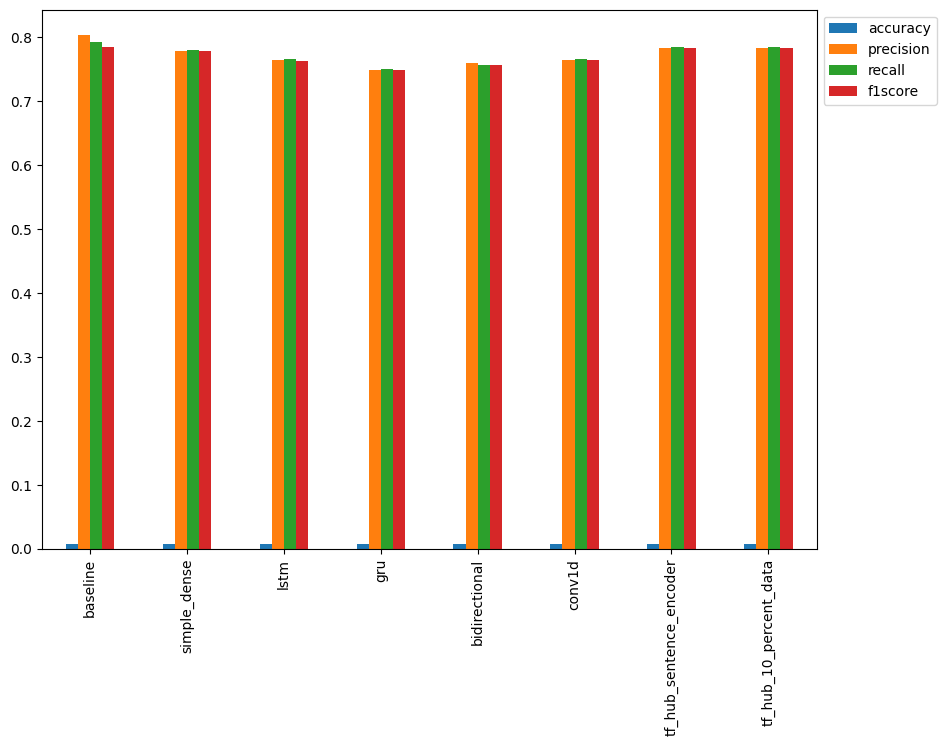

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

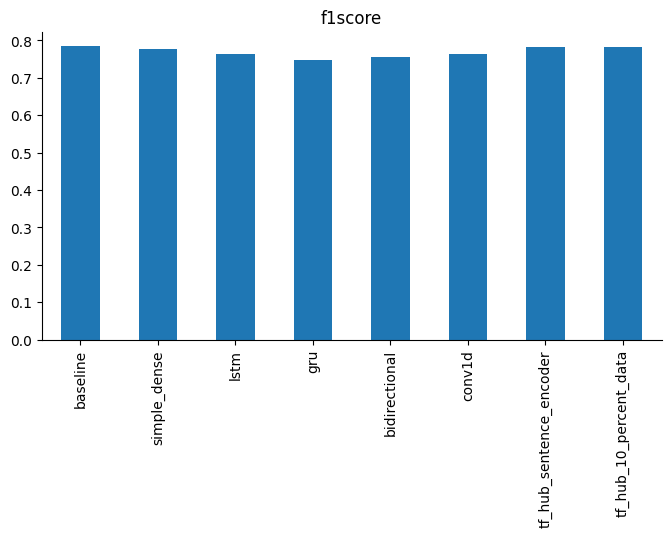

In [ ]:
# Bar graph plot for f1score

from matplotlib import pyplot as plt
all_model_results.sort_values('f1score', ascending=False)['f1score'].plot(kind='bar', figsize=(8, 4), title='f1score')
plt.gca().spines[['top', 'right']].set_visible(False)

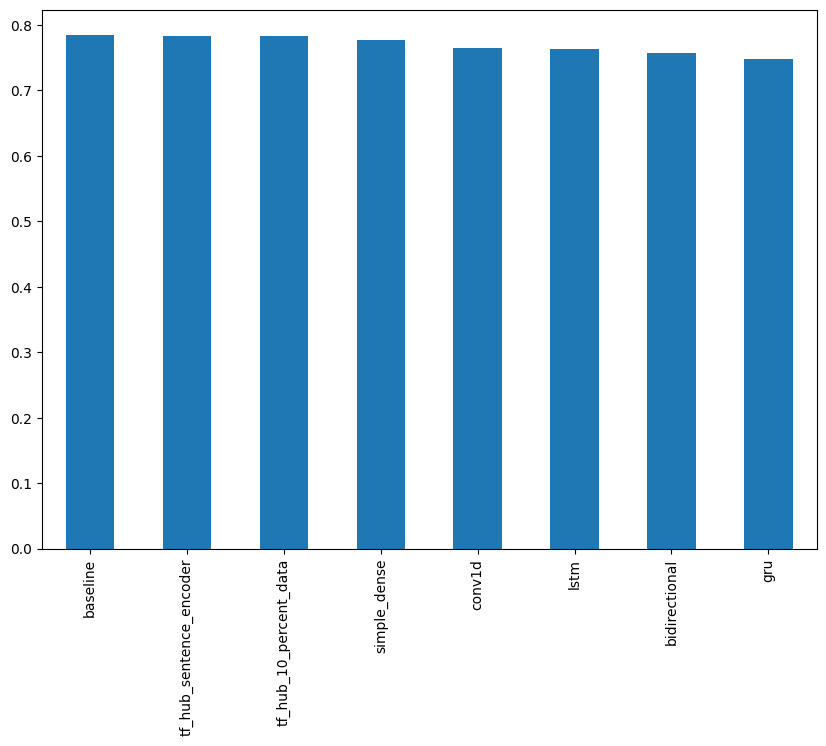

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1score", ascending=False)["f1score"].plot(kind="bar", figsize=(10, 7));

Drilling down into a single metric we see our USE TensorFlow Hub models performing  better than all of the other models. Interestingly, the baseline's F1-score isn't too far off the rest of the deeper models.


### Finding the most wrong examples

We mentioned before that if many of our modelling experiments are returning similar results, despite using different kinds of models, it's a good idea to return to the data and inspect why this might be.

One of the best ways to inspect your data is to sort your model's predictions and find the samples it got *most* wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

Once again, visualization is your friend. Visualize, visualize, visualize.

To make things visual, let's take our best performing model's prediction probabilities and classes along with the validation samples (text and ground truth labels) and combine them in a pandas DataFrame.

* If our best model still isn't perfect, what examples is it getting wrong?
* Which ones are the *most* wrong?
* Are there some labels which are wrong? E.g. the model gets it right but the ground truth label doesn't reflect this

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_text,
                       "target": val_label,
                       "pred": use_preds,
                       "pred_prob": tf.squeeze(use_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,@olliebailey11 havnt you crashed ? ??,0,0.0,0.197136
1,Did you miss the #BitCoin explosion - Don't mi...,0,0.0,0.179576
2,FYI: ;ACCIDENT PROPERTY DAMAGE;3460 LIMESTONE ...,1,1.0,0.717188
3,#psd #special Olap #world pres: http://t.co/9x...,1,1.0,0.598664
4,MORE--&gt;OSHA officers on siteinvestigating N...,1,1.0,0.783664


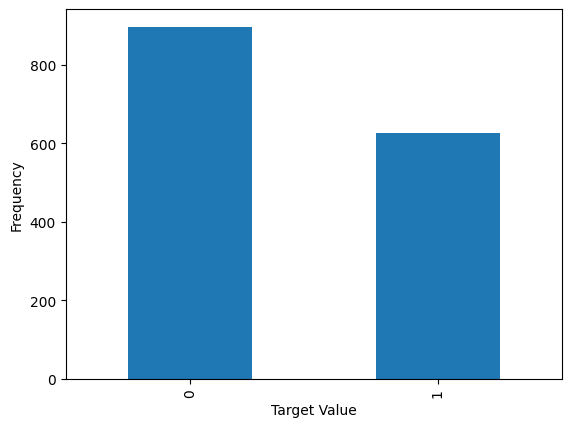

In [ ]:
# Frequency of Negative vs Positive Tweets

import matplotlib.pyplot as plt
val_df['target'].value_counts().plot(kind='bar')
plt.xlabel('Target Value')
plt.ylabel('Frequency')

In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
1417,FAAN orders evacuation of abandoned aircraft a...,0,1.0,0.835570
450,#Turkish couple decided to feed 4000 #Syrian #...,0,1.0,0.823121
1269,Teen Disaster Preparedness Event in Van Nuys A...,0,1.0,0.810307
156,@RockBottomRadFM Is one of the challenges on T...,0,1.0,0.779279
1138,#entertainment Hollywood movie about trapped m...,0,1.0,0.769280
1091,Governor allows parole for California school b...,0,1.0,0.758526
167,Newlyweds feed thousands of Syrian refugees in...,0,1.0,0.758499
1459,Newlyweds feed Syrian refugees at their weddin...,0,1.0,0.757282
507,RSS: Judge orders Texas to recognize spouse on...,0,1.0,0.755543
278,http://t.co/X5XUMtoEkE Nuclear Emergency Curre...,0,1.0,0.752053


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.8355699181556702
Text:
FAAN orders evacuation of abandoned aircraft at MMA http://t.co/dEvYbnVXGQ via @todayng

----

Target: 0, Pred: 1, Prob: 0.8231205940246582
Text:
#Turkish couple decided to feed 4000 #Syrian #refugees as part of their #wedding celebrations http://t.co/EHLq3ZSPTd http://t.co/DjX5eLbrv1

----

Target: 0, Pred: 1, Prob: 0.8103072643280029
Text:
Teen Disaster Preparedness Event in Van Nuys August 11 @ 5:30pm http://t.co/fXUX987vZx via @VanNuysCouncil

----

Target: 0, Pred: 1, Prob: 0.779278576374054
Text:
@RockBottomRadFM Is one of the challenges on Tough Enough rescuing people from burning buildings?

----

Target: 0, Pred: 1, Prob: 0.7692800164222717
Text:
#entertainment Hollywood movie about trapped miners released in Chile: SANTIAGO Chile (AP) ÛÓ The Hollyw... http://t.co/C22ecVl4Hw #news

----

Target: 0, Pred: 1, Prob: 0.7585263252258301
Text:
Governor allows parole for California school bus hijacker | Fresno Linked Local Network h

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.1486608386039734
Text:
@Truly_Stings Yo Dm me

----

Target: 1, Pred: 0, Prob: 0.1428171545267105
Text:
ok peace I hope I fall off a cliff along with my dignity

----

Target: 1, Pred: 0, Prob: 0.1381349265575409
Text:
Even if u have your weapon and your badge we gonna put them choppas on your ass????

----

Target: 1, Pred: 0, Prob: 0.13280880451202393
Text:
I was blow drying my hair &amp; the cable caught on fire. I let go of it as soon as I realized. Just before I could get electrocuted ??

----

Target: 1, Pred: 0, Prob: 0.1313474178314209
Text:
Until my death I'll forever rep the Jets.

----

Target: 1, Pred: 0, Prob: 0.13113129138946533
Text:
@APhiABeta1907 w/ugliness due 2 your 'ugly'@AMESocialAction Frat's BIOTERRORISMI'm she who's @FBI ID U $tolewant'g another in my Home.@ABC

----

Target: 1, Pred: 0, Prob: 0.11320941895246506
Text:
@PipRhys I predict a riot.

----

Target: 1, Pred: 0, Prob: 0.1065850704908371
Text:
Can't watch PVRIS I'm so sad bc 

## Making predictions on the test dataset

Alright we've seen how our model's perform on the validation set.

But how about the test dataset?

We don't have labels for the test dataset so we're going to have to make some predictions and inspect them for ourselves.

Let's write some code to make predictions on random samples from the test dataset and visualize them.

In [ ]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 38ms/step
Pred: 1, Prob: 0.9630464315414429
Text:
And Kolkata is struck by a Cyclonic Storm. Sumthng big is gonna happen 2day evng. Heavy rains nd a violent storm approachng. God help us.

----

1/1 [==============================] - 0s 34ms/step
Pred: 0, Prob: 0.08531701564788818
Text:
@itsTiimothy bhill bruh you can obliterate beez

----

1/1 [==============================] - 0s 35ms/step
Pred: 1, Prob: 0.9587200880050659
Text:
New drought monitor showing drought spreads in ETX. 'Severe Drought' in Marion/Harrison Counties. @KLTV7 http://t.co/v8eG2kSLoH

----

1/1 [==============================] - 0s 36ms/step
Pred: 1, Prob: 0.5783308148384094
Text:
Sun_OfGod: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.

----

1/1 [==============================] - 0s 35ms/step
Pred: 0, Prob: 0.058215707540512085
Text:
I'm going into a panic attack

----

1/1 [==================

## Predicting on Tweets from the wild

How about we find some Tweets and use our model to predict whether or not they're about a diaster or not?

To start, let's take one of my own [Tweets on living life like an ensemble model](https://twitter.com/mrdbourke/status/1313649328351662082).

In [ ]:
# Turn Tweet into string
mikias_tweet = "I am blessed, Thankgod for giving us your forgiveness, mercy and grace, It such a blessed life you planned for us all along."

In [ ]:
# Function to predict the tweet given a tweet and model
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [ ]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=mikias_tweet)

1/1 [==============================] - 0s 38ms/step
Pred: 0.0 (not real disaster) Prob: 0.08686426281929016
Text:
I am blessed, Thankgod for giving us your forgiveness, mercy and grace, It such a blessed life you planned for us all along.


> Great prediction, we get a desired result using a tweet made by myself. This can be a testiment for the generalizing performance of our model.

### Uploading to TensorBoard

We can also visualize all of our model's training logs using TensorBoard.dev.

In [ ]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "NLP modelling experiments" \
#   --description "A series of different NLP modellings experiments with various models" \
#   --one_shot # exits the uploader when upload has finished

In [ ]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

### Saving and loading a trained model

Saving your models also enables you to export them for use elsewhere outside of your notebooks, such as in a web application.

There are two main ways of saving a model in TensorFlow:

1. The `HDF5` format.
2. The `SavedModel` format (default).

HDF5 is a more general format that can be used to save and load data in a variety of formats. SavedModel is a TensorFlow-specific format that is optimized for saving and loading TensorFlow models.

In general, SavedModel is the preferred format for saving and loading TensorFlow models. However, HDF5 can be a good option if you need to save a model that can be used with other frameworks or if you need to save the model architecture along with the weights.

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_text, val_label)

48/48 [==============================] - 1s 9ms/step - loss: 0.4141 - accuracy: 0.8306


[0.4141045808792114, 0.8305975198745728]

Calling the `save()` method on our target model and passing it a filepath allows us to save our model in the `SavedModel` format.

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [ ]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_text, val_label)

48/48 [==============================] - 1s 9ms/step - loss: 0.4141 - accuracy: 0.8306


[0.4141045808792114, 0.8305975198745728]

> We can see that saving and loading our model with either format results in the same performance.